# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

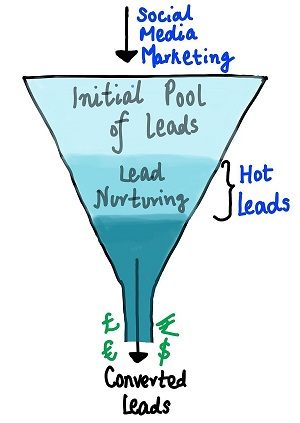


As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.



Data

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.

# Step1:   Importing Neccessary Libraries

In [1]:

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, f1_score


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore")

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 800)

In [3]:
pd.options.display.float_format = '{:.4f}'.format

# Step2:   Data Reading  And Understanding 

In [4]:
# Reading the csv file.

Leads = pd.read_csv("Leads.csv")

In [5]:
# Check the head of the dataset.

Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0000,0,0.0000,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0000,15.0000,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0000,674,2.5000,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0000,15.0000,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0000,1532,2.0000,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0000,20.0000,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0000,305,1.0000,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0000,17.0000,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0000,1428,1.0000,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0000,18.0000,No,No,Modified


In [6]:
# Inspect the various aspects.

Leads.shape

(9240, 37)

In [7]:
# Checking Null values

Leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [8]:
# Checking Numerical data


Leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.0000,9240.0000,9103.0000,9240.0000,9103.0000,5022.0000,5022.0000
mean,617188.4356,0.3854,3.4452,487.6983,2.3628,14.3063,16.3449
std,23405.9957,0.4867,4.8549,548.0215,2.1614,1.3867,1.8114
min,579533.0000,0.0000,0.0000,0.0000,0.0000,7.0000,11.0000
25%,596484.5000,0.0000,1.0000,12.0000,1.0000,14.0000,15.0000
50%,615479.0000,0.0000,3.0000,248.0000,2.0000,14.0000,16.0000
75%,637387.2500,1.0000,5.0000,936.0000,3.0000,15.0000,18.0000
max,660737.0000,1.0000,251.0000,2272.0000,55.0000,18.0000,20.0000


In [9]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Performing Some EDA

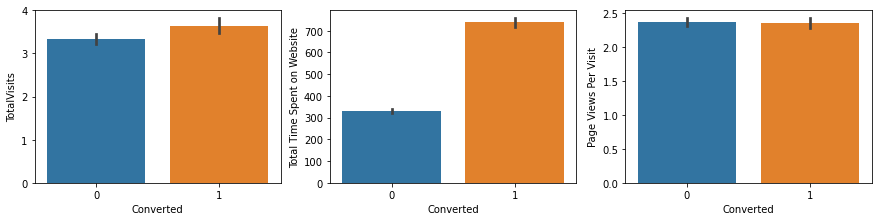

In [10]:
# Ploting Bar Plot for better Understanding.

plt.figure( figsize = (15, 7))

plt.subplot(2,3,1)
sns.barplot( x = 'Converted', y = 'TotalVisits', data = Leads)

plt.subplot(2,3,2)
sns.barplot( x = 'Converted', y = 'Total Time Spent on Website', data = Leads)

plt.subplot(2,3,3)
sns.barplot( x = 'Converted', y = 'Page Views Per Visit', data = Leads)

plt.show()

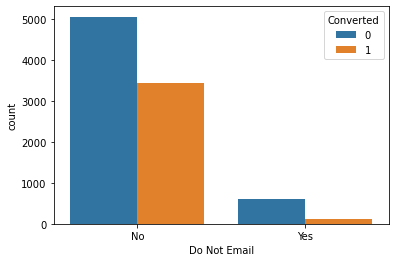

In [11]:
# Converted v/s Do Not Email 

plt.figure( figsize=(6, 4))
sns.countplot( x = "Do Not Email", hue="Converted", data = Leads)
plt.show()

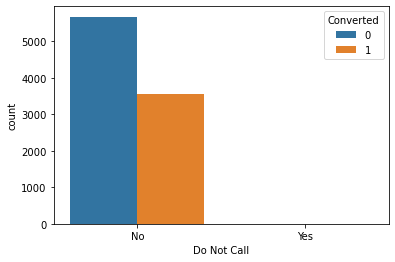

In [12]:
# Converted v/s Do Not Call

plt.figure( figsize = (6, 4))
sns.countplot( x = "Do Not Call", hue="Converted", data = Leads)
plt.show()

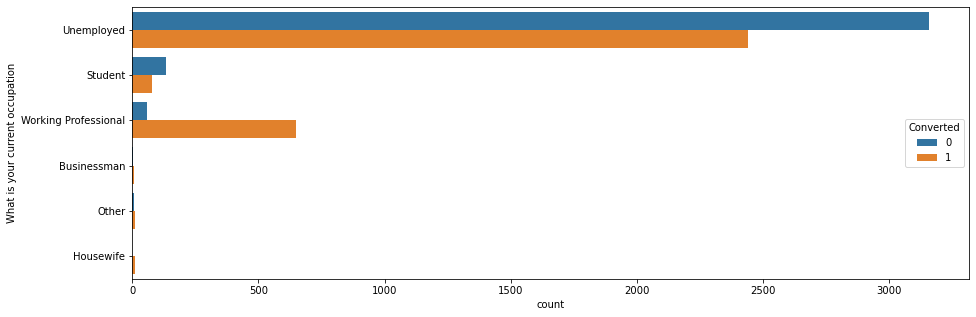

In [13]:
# Converted v/s Current Occupation 

plt.figure( figsize = (15, 5))
sns.countplot( y = "What is your current occupation", hue ="Converted", data = Leads)
plt.show()

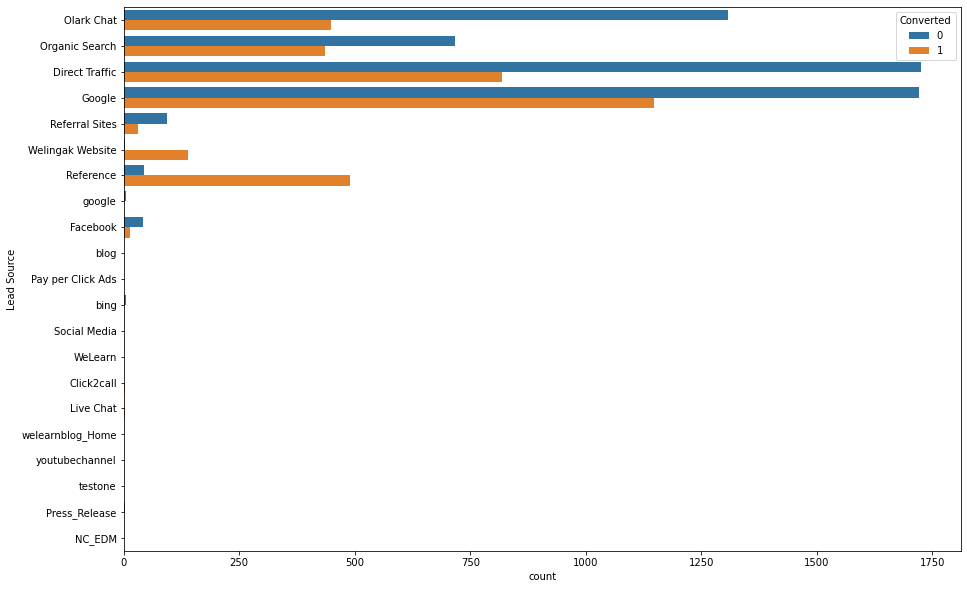

In [14]:
# Converted v/s Lead Source

plt.figure( figsize = (15, 10))
sns.countplot( y = "Lead Source", hue = "Converted", data = Leads)
plt.show()

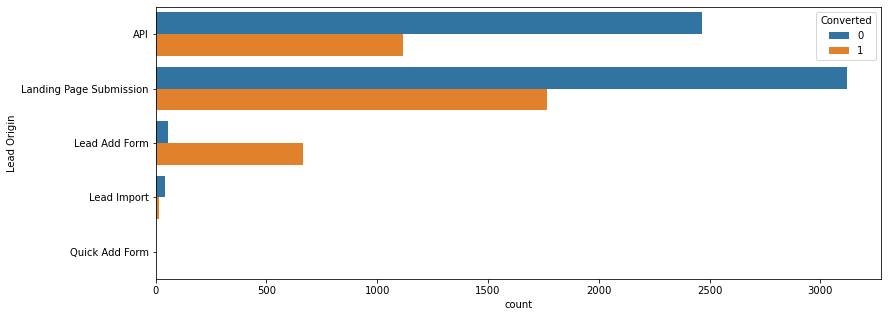

In [15]:
# Converted v/s Lead Origin

plt.figure( figsize = (13, 5))
sns.countplot( y = "Lead Origin", hue = "Converted", data = Leads)
plt.show()

<AxesSubplot:xlabel='Lead Quality', ylabel='count'>

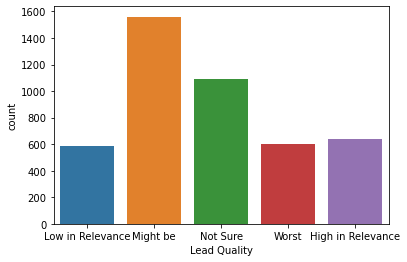

In [16]:
# Checking Lead Quality Coloumns.

sns.countplot(Leads['Lead Quality'])


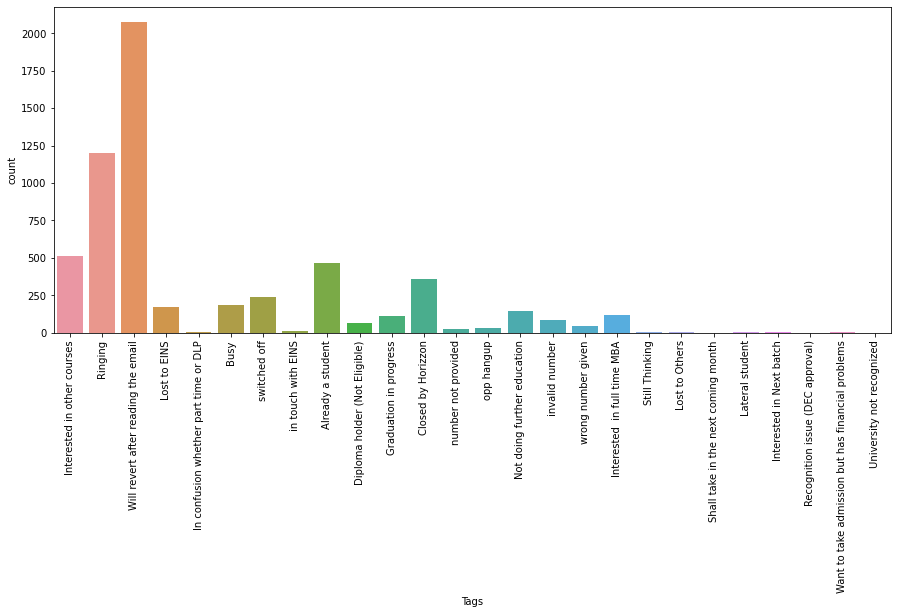

In [17]:
# Converted v/s Tags.

plt.figure(figsize = (15,6))
sns.countplot(Leads.Tags)
plt.xticks(rotation = 90)
plt.show()

Observations from EDA 

- Major Conversions happened from 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'.
- Major Conversions happened from 'Email' which was sent.
- Major Conversions happened from 'Calls' which are made
- Major Conversions is from 'Unemployed Group'.
- Major lead source is from 'Google'.
- Most of Conversions happened from the 'Landing Page Submission'.

In [18]:
#  Counting Variables for better Undersanding

for i in Leads.columns:
    print(Leads[i].value_counts())
    print("")
    print("======================================================================")
    print("")

9d35620e-0e91-4472-a780-123d8a583ee7    1
39fd64c1-3df6-43e4-9ff0-7ab5f8011009    1
bf1274fe-c590-495b-9059-827c4b23a0ac    1
e1ae760b-29d5-4916-9c76-b09d0d277c8e    1
c9bbd996-a573-453d-b1f7-a52f3971ac7e    1
                                       ..
6b7f56ca-46bb-4331-b23f-3eb204fa8736    1
fca023d6-d23e-43fa-9d91-2f1642744999    1
b6fa82dc-e10b-4f8a-ba5c-575c17d97024    1
39ec53e4-f477-4ed7-ad7c-022269c70405    1
73c185f4-88f1-497e-b825-b05fd8ea10ec    1
Name: Prospect ID, Length: 9240, dtype: int64


655360    1
604698    1
621242    1
619195    1
600768    1
         ..
593502    1
636228    1
648518    1
580937    1
608255    1
Name: Lead Number, Length: 9240, dtype: int64


Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference   

**from the above the information  will make some  insights**

- Removing Variables 
       - Prospect ID - Not Needed
       - Lead Number - Not Needed
       - Country- Not Needed
       - Magazine - Column has only 'No' which doesn't make any sense to keep it so removing this.
       - Receive More Updates About Our Courses - Column has only 'No' which doesn't make any sense to keep it.
       - Update me on Supply Chain Content - Column has only 'No' which doesn't make any sense to keep it so that not required.
       - Get updates on DM Content - Column has only 'No' which doesn't make any sense to keep it so not needed.
       - City - Not Required
       - I agree to pay the amount through cheque - Column has only 'No' which doesn't make any sense to keep it
       


# Step3:   Cleaning the Data


In [19]:
# Checking null values

Leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

As we see there are many columns with high number of null values. As there are 9000 datapoints in our dataframe, let's eliminate the columns having greater than 3000 missing values as they are of no use.

In [20]:
# Drop all the columns in which greater than 3000 missing values are present

for col in Leads.columns:
    if Leads[col].isnull().sum() > 3000:
        Leads.drop(col, 1, inplace=True)

In [22]:
# Check the number of null values again

Leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [23]:
# Let's now check the percentage of missing values in each column

round(100*(Leads.isnull().sum()/len(Leads.index)), 2)

Prospect ID                                      0.0000
Lead Number                                      0.0000
Lead Origin                                      0.0000
Lead Source                                      0.3900
Do Not Email                                     0.0000
Do Not Call                                      0.0000
Converted                                        0.0000
TotalVisits                                      1.4800
Total Time Spent on Website                      0.0000
Page Views Per Visit                             1.4800
Last Activity                                    1.1100
Country                                         26.6300
Specialization                                  15.5600
How did you hear about X Education              23.8900
What is your current occupation                 29.1100
What matters most to you in choosing a course   29.3200
Search                                           0.0000
Magazine                                        

In [24]:
# Check the number of null values again

Leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

There are a few columns in which there is a level called 'Select' which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.

In [25]:
# Get the value counts of all the columns

for column in Leads:
    print(Leads[column].astype('category').value_counts())
    print('___________________________________________________')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

The following three columns now have the level 'Select'. Let's check them once again.
1. Lead Profile
2. How did you hear about X Education
3. Specialization


The levels Lead Profile and How did you hear about X Education have a lot of rows which have the value Select which is of no use to the analysis so it's best that we drop them

In [26]:
Leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

Also notice that when you got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque. Since practically all of the values for these variables are No, it's best that we drop these columns as they won't help with our analysis.

In [27]:
Leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

The variable What matters most to you in choosing a course has the level Better Career Prospects 6528 times while the other two levels appear once twice and once respectively. So lets drop this column as well.

In [28]:
# Drop the null value rows present in the variable 'What matters most to you in choosing a course'

Leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

Observed that columns city and country are skewed columns so lets drop them as well

In [29]:
Leads.drop(['City'], axis = 1, inplace = True)

In [30]:
Leads.drop(['Country'], axis = 1, inplace = True)

In [31]:
# Check the number of null values again

Leads.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

Now, there's the column What is your current occupation which has a lot of null values. 
W can drop the entire columns but since we have already lost so many feature variables, hence let's just drop the null rows for the column What is you current occupation.

In [32]:
Leads = Leads[~pd.isnull(Leads['What is your current occupation'])]

In [33]:
# Check the number of null values again

Leads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

Since now the number of null values present in the columns are quite small we can simply drop the rows in which these null values are present.

In [34]:
# Drop the null value rows in the column 'TotalVisits'

Leads = Leads[~pd.isnull(Leads['TotalVisits'])]

In [35]:
# Check the number of null values again

Leads.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [36]:
# Drop the null values rows in the column 'Lead Source'

Leads = Leads[~pd.isnull(Leads['Lead Source'])]

In [37]:
# Check the number of null values again

Leads.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [38]:
# Drop the null values rows in the column 'Specialization'

Leads = Leads[~pd.isnull(Leads['Specialization'])]

In [39]:
# Check the number of null values again

Leads.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

Now your data doesn't have any null values.

In [40]:
# Let's look at the dataset again

Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0000,0,0.0000,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0000,674,2.5000,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0000,1532,2.0000,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0000,305,1.0000,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0000,1428,1.0000,Converted to Lead,Select,Unemployed,No,Modified


Variables Prospect ID and Lead Number won't be of any use in the analysis, so lrt us drop these two variables.

In [41]:
Leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [42]:
Leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0000,0,0.0000,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0000,674,2.5000,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0000,1532,2.0000,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0000,305,1.0000,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0000,1428,1.0000,Converted to Lead,Select,Unemployed,No,Modified


# Prepare the data for modelling

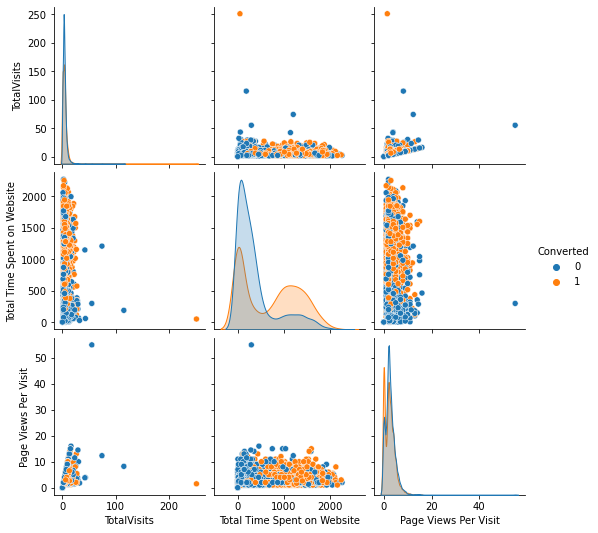

In [43]:
sns.pairplot(Leads, hue='Converted')
plt.show()

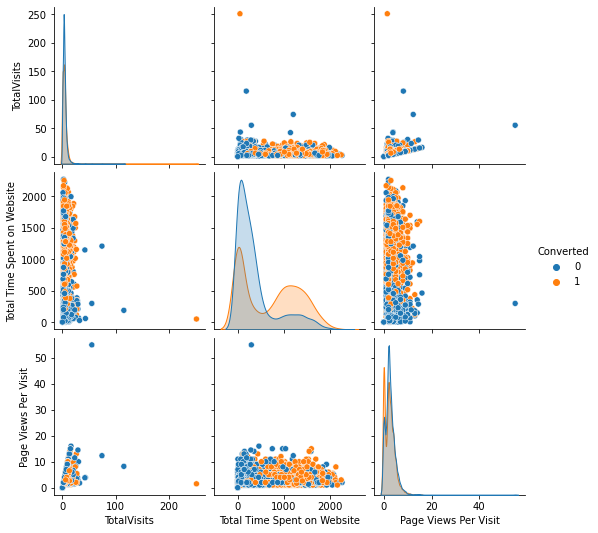

In [44]:
Leads2 = Leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(Leads2,diag_kind='kde',hue='Converted')
plt.show()

In [45]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
transformed = pd.DataFrame(pt.fit_transform(Leads2))
transformed.columns = Leads2.columns
transformed.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-1.5400,-1.5325,-1.5347,-0.9626
1,0.6909,0.6419,0.2308,-0.9626
2,-0.2197,1.2625,-0.0190,1.0389
3,-0.7239,0.1537,-0.6298,-0.9626
4,-0.2197,1.2042,-0.6298,1.0389


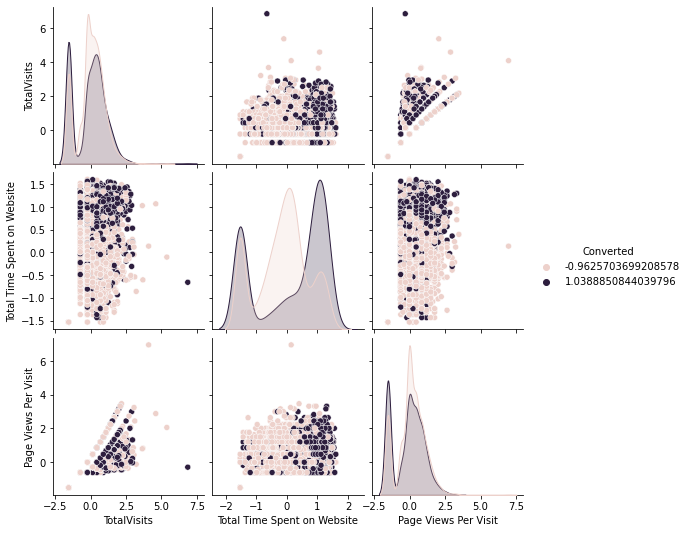

In [46]:
sns.pairplot(transformed, diag_kind='kde',hue='Converted')
plt.show()

# Dummy variable creation

Let us check categorical variables now

In [47]:
# Check the columns which are of type 'object'

cat = Leads.loc[:, Leads.dtypes == 'object']
cat.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [48]:
# Create dummy variables using the 'get_dummies' command

dummy = pd.get_dummies(Leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe

Leads = pd.concat([Leads, dummy], axis=1)

In [49]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(Leads['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
Leads = pd.concat([Leads, dummy_spl], axis = 1)

In [50]:
# Drop the variables for which the dummy variables have been created

Leads = Leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [51]:
# Let's take a look at the dataset again

Leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0000,0,0.0000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0000,674,2.5000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0000,1532,2.0000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0000,305,1.0000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0000,1428,1.0000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Step4:   Data Preparation


# Test-Train Split
The next step is to split the dataset into training and testing sets.

In [52]:
# Import the required library

from sklearn.model_selection import train_test_split

In [53]:
# Put all the feature variables in X

X = Leads.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0000,0,0.0000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0000,674,2.5000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0000,1532,2.0000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0000,305,1.0000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0000,1428,1.0000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
# Put the target variable in y

y = Leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [55]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Scaling
Now there are a few numeric variables present in the dataset which have different scales. Hence we need to scale these variables.

In [56]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [57]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.0159,0.0295,0.1250,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
218,0.0159,0.0823,0.2500,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4171,0.0239,0.0343,0.3750,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4037,0.0000,0.0000,0.0000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3660,0.0000,0.0000,0.0000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


# Correlations
Let's look at the correlations.

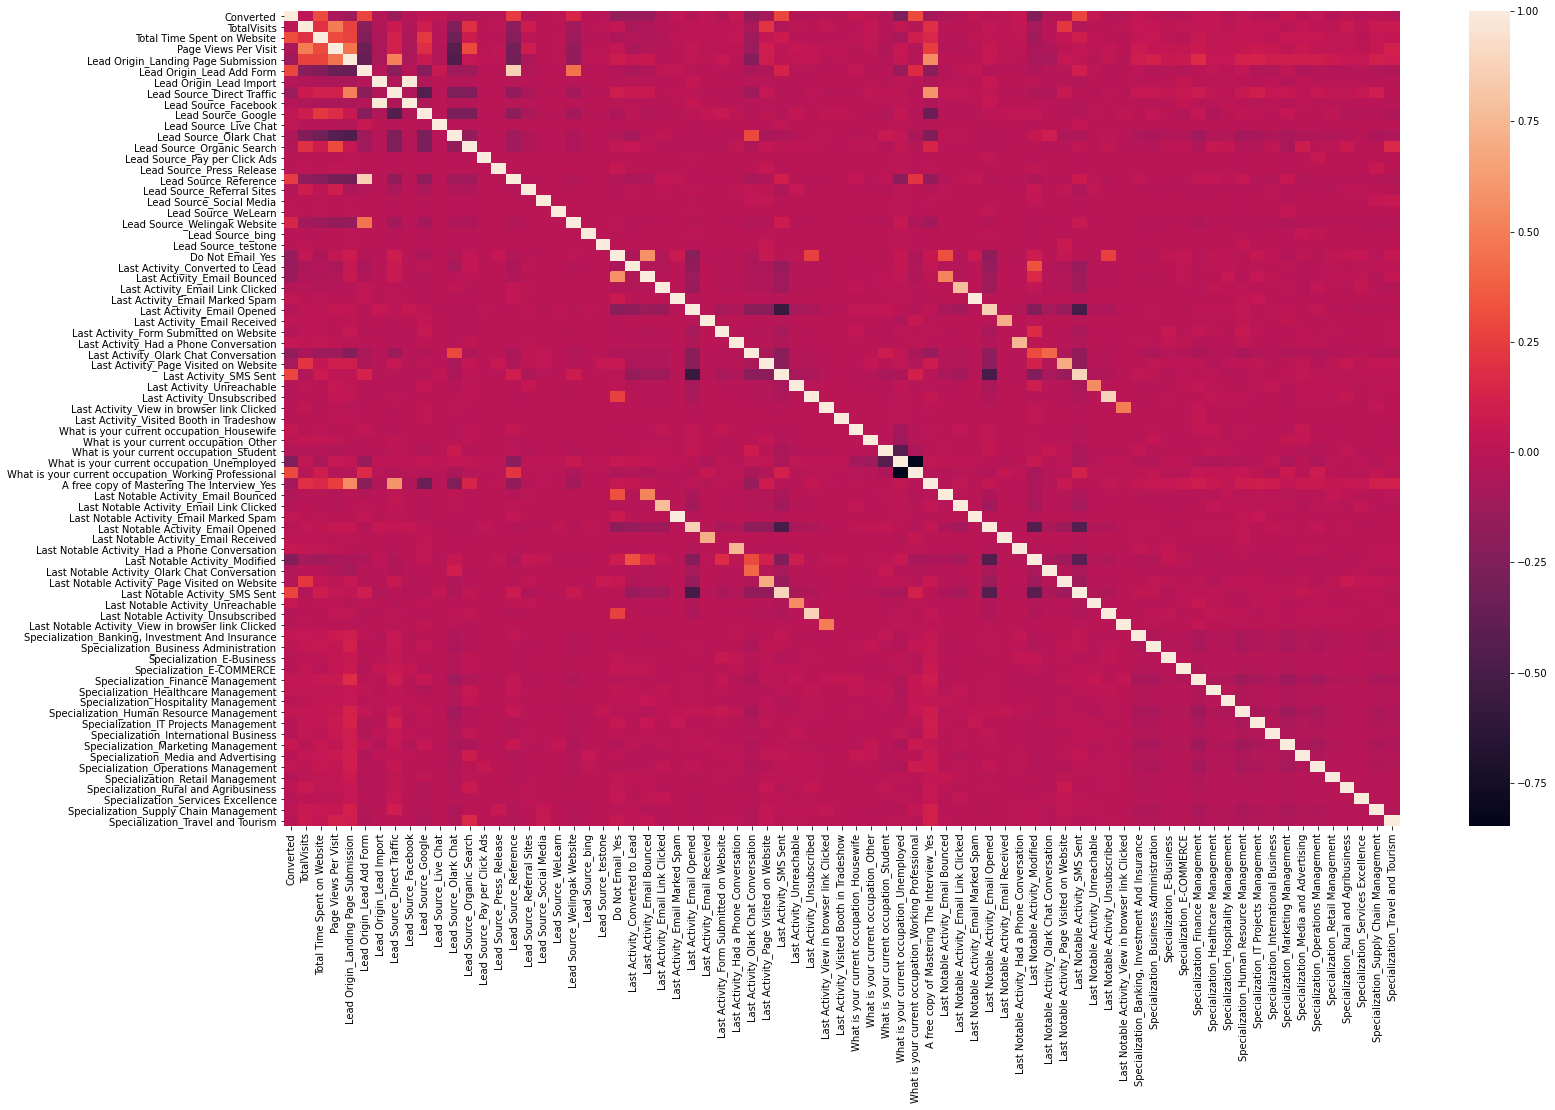

In [58]:
# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(Leads.corr())
plt.show()

# Model Building

Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So let's select a small set of features from this pool of variables using RFE.

In [59]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [60]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [61]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 51),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 44),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Pay per Click Ads', False, 43),
 ('Lead Source_Press_Release', False, 53),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Social Media', False, 58),
 ('Lead Source_WeLearn', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 33),
 ('Lead Source_testone', False, 38),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 25),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link C

In [62]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

As we are interested in the p-values and the VIFs, let's use above variables to create a logistic regression model using statsmodels.

In [63]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [64]:
# Import statsmodels

import statsmodels.api as sm

In [65]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Mon, 07 Feb 2022   Deviance:                       4145.5
Time:                        15:03:21   Pearson chi2:                 4.84e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0061      0.600     -1.677      0.094      -2.182       0.170
TotalVisits                                             11.3439      2.682      4.230      0.000       6.088      16.600
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                2.9483      1.191      2.475      0.013       0.614       5.283
Lead Source_Olark Chat                                   1.4584      0.122     11.962      0.000       1.219       1.697
Lead Source_Reference                                    1.2994      1.214      1.070      0.285      -1.080       3.679
Lead Source_Welingak Website                             3.4159      1.558      2.192      0.028       0.362       6.470
Do Not Email_Yes                                        -1.5053      0.193     -7.781      0.000      -1.884      -1.126
Last Activity_Had a Phone Conversation                   1.0397      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6492   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1544      0.630     -1.831      0.067      -2.390       0.081
What is your current occupation_Unemployed              -1.3395      0.594     -2.254      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1932   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7868      0.807      3.453      0.001       1.205       4.369
========================================================================================================================
"""

There are few variables which have a p-value greater than 0.05.  let's also look at the VIFs now.

In [66]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,Lead Origin_Lead Add Form,84.1900
4,Lead Source_Reference,65.1800
5,Lead Source_Welingak Website,20.0300
11,What is your current occupation_Unemployed,3.6500
7,Last Activity_Had a Phone Conversation,2.4400
13,Last Notable Activity_Had a Phone Conversation,2.4300
1,Total Time Spent on Website,2.3800
0,TotalVisits,1.6200
8,Last Activity_SMS Sent,1.5900
12,What is your current occupation_Working Professional,1.5600


VIFs seem to be in a decent range except for three variables.

Let's first drop the variable Lead Source_Reference since it has a high p-value as well as a high VIF.

In [68]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

In [69]:
# Lets repeat the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Mon, 07 Feb 2022   Deviance:                       4146.5
Time:                        15:03:22   Pearson chi2:                 4.82e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0057      0.600     -1.677      0.094      -2.181       0.170
TotalVisits                                             11.3428      2.682      4.229      0.000       6.086      16.599
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                4.2084      0.259     16.277      0.000       3.702       4.715
Lead Source_Olark Chat                                   1.4583      0.122     11.960      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5036      0.193     -7.779      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   1.0398      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6511   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1537      0.630     -1.830      0.067      -2.389       0.082
What is your current occupation_Unemployed              -1.3401      0.594     -2.255      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2748      0.623      2.046      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1934   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7872      0.807      3.454      0.001       1.205       4.369
========================================================================================================================
"""

In [70]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.6500
6,Last Activity_Had a Phone Conversation,2.4400
12,Last Notable Activity_Had a Phone Conversation,2.4300
1,Total Time Spent on Website,2.3800
2,Lead Origin_Lead Add Form,1.7100
0,TotalVisits,1.6200
7,Last Activity_SMS Sent,1.5900
11,What is your current occupation_Working Professional,1.5600
3,Lead Source_Olark Chat,1.4400
4,Lead Source_Welingak Website,1.3300


The VIFs are now all less than 5. So let's drop the ones with the high p-values.
Lets 1st drop Last Notable Activity_Had a Phone Conversation.

In [71]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)


In [72]:
# Lets repeat the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.1
Date:                Mon, 07 Feb 2022   Deviance:                       4152.2
Time:                        15:03:22   Pearson chi2:                 4.82e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0069      0.600     -1.679      0.093      -2.182       0.168
TotalVisits                                             11.4551      2.686      4.265      0.000       6.191      16.720
Total Time Spent on Website                              4.4237      0.185     23.900      0.000       4.061       4.787
Lead Origin_Lead Add Form                                4.2082      0.259     16.276      0.000       3.701       4.715
Lead Source_Olark Chat                                   1.4581      0.122     11.958      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5037      0.193     -7.780      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   2.7502      0.802      3.430      0.001       1.179       4.322
Last Activity_SMS Sent                                   1.1826      0.082     14.364      0.000       1.021       1.344
What is your current occupation_Housewife               21.6525   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1520      0.630     -1.828      0.068      -2.387       0.083
What is your current occupation_Unemployed              -1.3385      0.594     -2.253      0.024      -2.503      -0.174
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.495
Last Notable Activity_Unreachable                        2.7862      0.807      3.453      0.001       1.205       4.368
========================================================================================================================
"""

What is your current occupation_Housewife columns has high p-value. hence let us drop it.

In [73]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)


In [74]:
# Repeat the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Mon, 07 Feb 2022   Deviance:                       4156.7
Time:                        15:03:22   Pearson chi2:                 4.83e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4528      0.554     -0.818      0.413      -1.538       0.632
TotalVisits                                             11.2586      2.672      4.214      0.000       6.023      16.495
Total Time Spent on Website                              4.4217      0.185     23.898      0.000       4.059       4.784
Lead Origin_Lead Add Form                                4.2057      0.258     16.274      0.000       3.699       4.712
Lead Source_Olark Chat                                   1.4530      0.122     11.930      0.000       1.214       1.692
Lead Source_Welingak Website                             2.1541      1.037      2.078      0.038       0.122       4.186
Do Not Email_Yes                                        -1.5063      0.193     -7.785      0.000      -1.886      -1.127
Last Activity_Had a Phone Conversation                   2.7515      0.802      3.432      0.001       1.180       4.323
Last Activity_SMS Sent                                   1.1823      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Student                 -1.7017      0.588     -2.893      0.004      -2.855      -0.549
What is your current occupation_Unemployed              -1.8879      0.550     -3.435      0.001      -2.965      -0.811
What is your current occupation_Working Professional     0.7246      0.581      1.248      0.212      -0.413       1.862
Last Notable Activity_Unreachable                        2.7834      0.807      3.448      0.001       1.201       4.365
========================================================================================================================
"""

Let us now drop What is your current occupation_Working Professional.

In [75]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)


In [76]:
# Repeat the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Mon, 07 Feb 2022   Deviance:                       4158.1
Time:                        15:03:22   Pearson chi2:                 4.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2040      0.196      1.043      0.297      -0.179       0.587
TotalVisits                                   11.1489      2.665      4.184      0.000       5.926      16.371
Total Time Spent on Website                    4.4223      0.185     23.899      0.000       4.060       4.785
Lead Origin_Lead Add Form                      4.2051      0.258     16.275      0.000       3.699       4.712
Lead Source_Olark Chat                         1.4526      0.122     11.934      0.000       1.214       1.691
Lead Source_Welingak Website                   2.1526      1.037      2.076      0.038       0.121       4.185
Do Not Email_Yes                              -1.5037      0.193     -7.774      0.000      -1.883      -1.125
Last Activity_Had a Phone Conversation         2.7552      0.802      3.438      0.001       1.184       4.326
Last Activity_SMS Sent                         1.1856      0.082     14.421      0.000       1.024       1.347
What is your current occupation_Student       -2.3578      0.281     -8.392      0.000      -2.908      -1.807
What is your current occupation_Unemployed    -2.5445      0.186    -13.699      0.000      -2.908      -2.180
Last Notable Activity_Unreachable              2.7846      0.807      3.449      0.001       1.202       4.367
==============================================================================================================
"""

In [77]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.8200
1,Total Time Spent on Website,2.0000
0,TotalVisits,1.5400
7,Last Activity_SMS Sent,1.5100
2,Lead Origin_Lead Add Form,1.4500
3,Lead Source_Olark Chat,1.3300
4,Lead Source_Welingak Website,1.3000
5,Do Not Email_Yes,1.0800
8,What is your current occupation_Student,1.0600
6,Last Activity_Had a Phone Conversation,1.0100


# Model Evaluation

So let's start making predictions using this final set of features.

In [78]:
    # Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003   0.3001
218    0.1420
4171   0.1276
4037   0.2916
3660   0.9548
207    0.1944
2044   0.1781
6411   0.9495
6498   0.0760
2085   0.9823
dtype: float64

In [79]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30011695, 0.14200165, 0.12762885, 0.29155814, 0.95479546,
       0.19442563, 0.17807328, 0.94946006, 0.07599465, 0.98231619])

Creating a dataframe with the actual conversion flag and the predicted probabilities

In [80]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.3001
1,0,0.1420
2,1,0.1276
3,1,0.2916
4,1,0.9548


Create a new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [81]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.3001,0
1,0,0.1420,0
2,1,0.1276,0
3,1,0.2916,0
4,1,0.9548,1


Let us evaluate the model now

In [82]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [83]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1929  383]
 [ 560 1589]]


In [84]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7886124187401928


In [85]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [86]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7886124187401928


In [87]:
# Calculate the sensitivity

TP/(TP+FN)

0.739413680781759

In [88]:
# Calculate the specificity

TN/(TN+FP)

0.8343425605536332

# Finding the Optimal Cutoff
Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [89]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [90]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [91]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

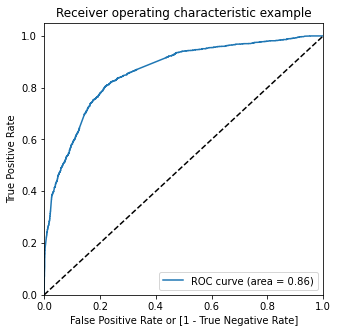

In [92]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.86. So we seem to have a good model. 

Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [93]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.3001,0,1,1,1,1,0,0,0,0,0,0
1,0,0.1420,0,1,1,0,0,0,0,0,0,0,0
2,1,0.1276,0,1,1,0,0,0,0,0,0,0,0
3,1,0.2916,0,1,1,1,0,0,0,0,0,0,0
4,1,0.9548,1,1,1,1,1,1,1,1,1,1,1


In [94]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

         prob  accuracy  sensi  speci
0.0000 0.0000    0.4817 1.0000 0.0000
0.1000 0.1000    0.5270 0.9944 0.0926
0.2000 0.2000    0.6983 0.9442 0.4697
0.3000 0.3000    0.7675 0.8660 0.6760
0.4000 0.4000    0.7920 0.8106 0.7747
0.5000 0.5000    0.7886 0.7394 0.8343
0.6000 0.6000    0.7572 0.6240 0.8811
0.7000 0.7000    0.7350 0.5435 0.9131
0.8000 0.8000    0.7115 0.4532 0.9516
0.9000 0.9000    0.6440 0.2797 0.9827


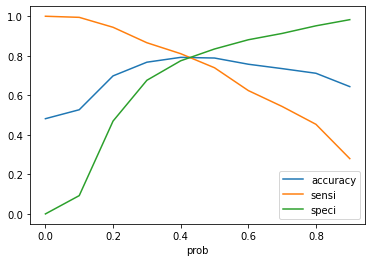

In [95]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As we can see in above plot that around 0.42, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.



In [96]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.3001,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.1420,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.1276,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.2916,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.9548,1,1,1,1,1,1,1,1,1,1,1,1


In [97]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1823,  489],
       [ 444, 1705]], dtype=int64)

In [98]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [99]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7886124187401928


In [100]:
# Calculate Sensitivity

TP/(TP+FN)

0.793392275476966

In [101]:
# Calculate Specificity

TN/(TN+FP)

0.7884948096885813

# Making Predictions on the Test Set
Let's now make predicitons on the test set.

In [102]:
# Scale the test set 

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [103]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,0.0000,0.0000,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,0.0279,0.0290,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,0.0159,0.4168,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,0.0120,0.3790,0,0,0,0,1,0,1,0,0,1,0,0,0
2668,0.0319,0.3952,0,0,0,0,0,0,1,0,0,1,0,0,0


In [104]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [105]:
# Check X_test_sm

X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,1.0000,0.0000,0.0000,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,1.0000,0.0279,0.0290,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,1.0000,0.0159,0.4168,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,1.0000,0.0120,0.3790,0,0,0,0,1,0,1,0,0,1,0,0,0
2668,1.0000,0.0319,0.3952,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0000,0.0120,0.0273,0,0,0,0,0,0,1,0,0,1,0,0,0
6583,1.0000,0.0120,0.1523,0,0,0,0,0,0,1,0,0,1,0,0,0
5531,1.0000,0.0558,0.7020,0,0,0,0,0,0,0,0,0,1,0,0,0
3056,1.0000,0.0120,0.4177,0,0,0,0,1,0,1,0,0,1,0,0,0


In [106]:
# Drop the required columns from X_test as well

X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation'], 1, inplace = True)

In [107]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [108]:
y_test_pred[:10]

4771   0.9963
6122   0.1300
9202   0.7039
6570   0.2996
2668   0.7208
4233   0.7922
3368   0.7040
9091   0.4645
5972   0.2830
3631   0.7865
dtype: float64

In [109]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [110]:
# Let's see the data

y_pred_1.head()

,0
4771,0.9963
6122,0.1300
9202,0.7039
6570,0.2996
2668,0.7208


In [111]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [112]:
# We have to remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [113]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [114]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.9963
1,0,0.1300
2,0,0.7039
3,1,0.2996
4,1,0.7208


In [115]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [116]:
# Let's see the data (head) of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.9963
1,0,0.1300
2,0,0.7039
3,1,0.2996
4,1,0.7208


In [117]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [118]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.9963,1
1,0,0.1300,0
2,0,0.7039,1
3,1,0.2996,0
4,1,0.7208,1


In [119]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7845188284518828

In [120]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[786, 210],
       [202, 714]], dtype=int64)

In [121]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [122]:
# Calculate sensitivity
TP / float(TP+FN)

0.7794759825327511

In [123]:
# Calculate specificity
TN / float(TN+FP)

0.7891566265060241

## Precision-Recall View

Let's now also build the training model using the precision-recall view

In [124]:
#Lets check confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1929,  383],
       [ 560, 1589]], dtype=int64)

In [125]:
# Precision
# TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8057809330628803

In [126]:
#Recall
#TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.739413680781759

## Precision and recall tradeoff

In [127]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [128]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)


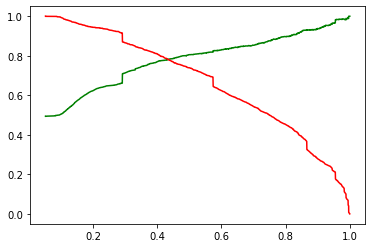

In [129]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [130]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.3001,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.1420,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.1276,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.2916,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.9548,1,1,1,1,1,1,1,1,1,1,1,1


In [131]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7895090786819099

In [132]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1852,  460],
       [ 479, 1670]], dtype=int64)

In [133]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [134]:
# Calculate Precision

TP/(TP+FP)

0.784037558685446

In [135]:
# Calculate Recall - sensitivity

TP/(TP+FN)

0.7771056305258259

In [136]:
# Calculate specificity
TN / (TN+FP)

0.801038062283737

With the current cut off as 0.42 we have Accuracy around 79%,  Precision around 78% , Recall around 78% and specificity around 80%.